## The Data

Data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Load the dataset
df = pd.read_csv('./datasets/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploratory Data Analysis (EDA)

In [3]:
# Check any missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
# Check statistical analysis
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

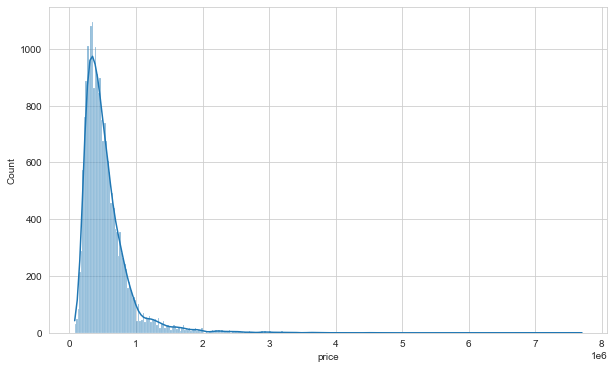

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

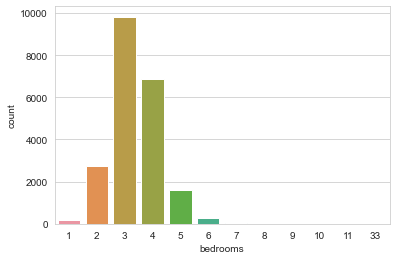

In [6]:
sns.countplot(x=df['bedrooms'])

<AxesSubplot:xlabel='waterfront', ylabel='price'>

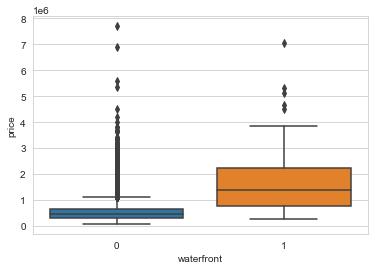

In [7]:
sns.boxplot(x='waterfront', y='price', data=df)

In [8]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

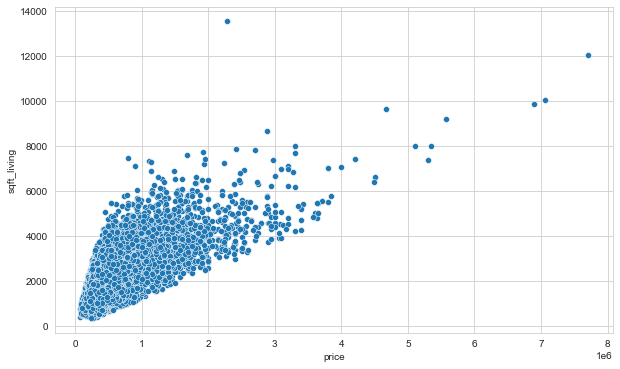

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='sqft_living', data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

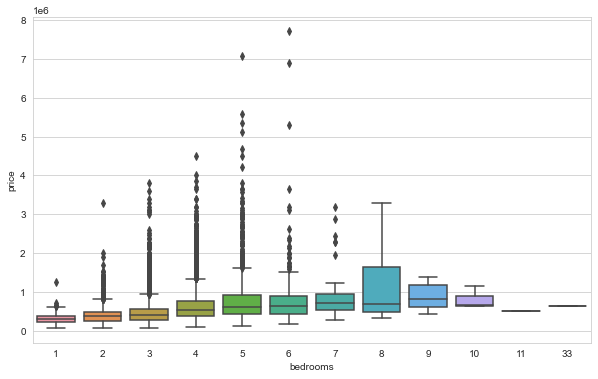

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)

**Finding hot spot from longitude and lattitude**

<AxesSubplot:xlabel='price', ylabel='long'>

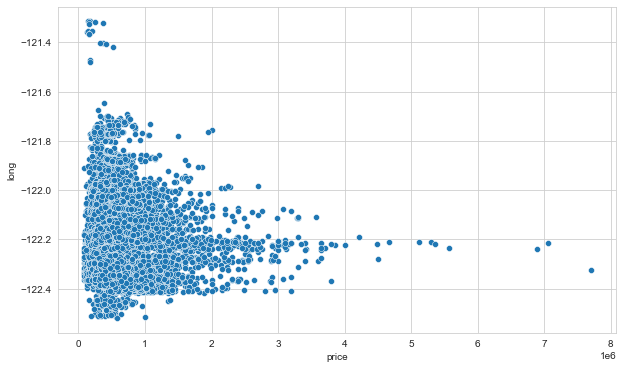

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='long', data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

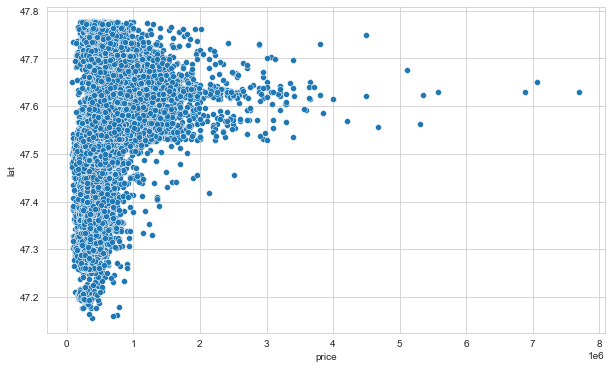

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='lat', data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

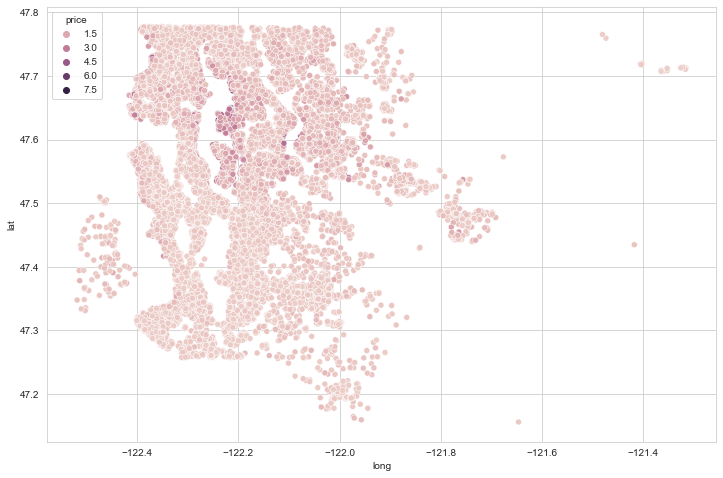

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

There are still outliers, we need to clean those just so that we could see clearly the visualization

In [14]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [15]:
len(df)*0.01

215.97

In [16]:
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:]
non_top_1_perc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


<AxesSubplot:xlabel='price', ylabel='Count'>

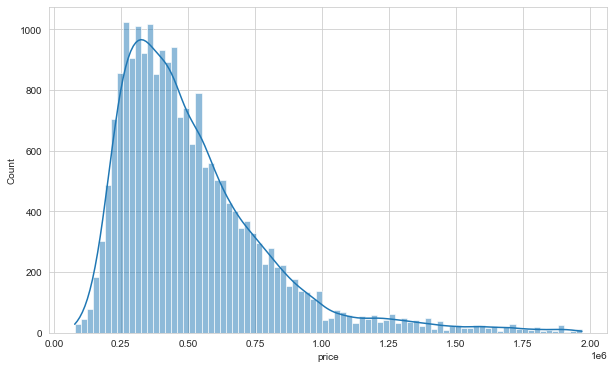

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(non_top_1_perc['price'], kde=True)

<AxesSubplot:xlabel='long', ylabel='lat'>

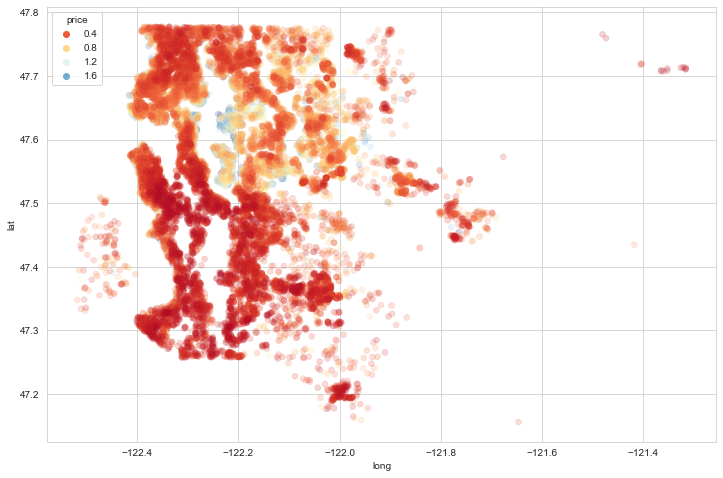

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc,
                hue='price', edgecolor=None, alpha=0.2, palette='RdYlBu')

## Feature Engineering

In [19]:
df.drop('id', axis=1, inplace=True)

In [20]:
df['date'] = pd.to_datetime(df['date'])

In [21]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [23]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [24]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

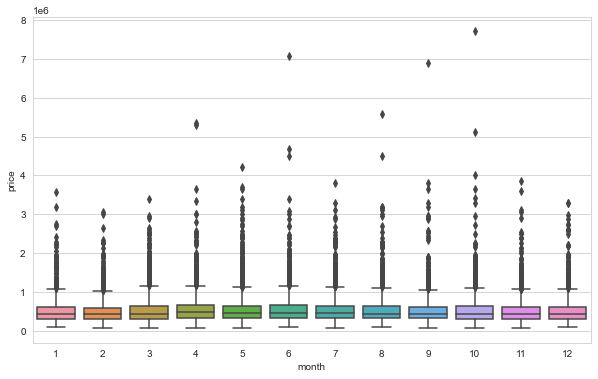

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='price', data=df)

<AxesSubplot:xlabel='month'>

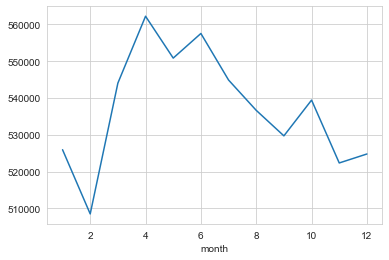

In [26]:
df.groupby(by='month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

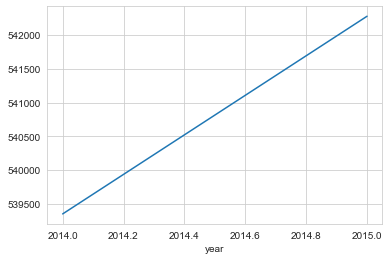

In [27]:
df.groupby(by='year').mean()['price'].plot()

In [28]:
df.drop('date', axis=1, inplace=True)

In [29]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [30]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

We could try to reduce the categories by looking at a King County map directly and for instances, tried to group by north-south-west-east or other group by. But in this case, to save time from manual feature engineering, we will drop this feature

In [31]:
df.drop('zipcode', axis=1, inplace=True)

In [32]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [33]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

0 = not renovated. We could divide the features into renovated and not renovated. But looking at the real situation, the more recent the houses are renovated, the higher price the houses might be. So in this case, we don't need to do feature engineering and keep it as is. The same situation also happens for `sqft_basement`.

In [34]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Build the model

In [35]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
len(X_train), len(X_test)

(15117, 6480)

Scale the train data

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
X_train = scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

Building the model

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
X_train.shape

(15117, 19)

In [44]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [45]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), # Won't update weights and biases so it's okay to use the test set
          batch_size=128,
          epochs=400,
          verbose=0)
print('Training done')

Training done


In [48]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

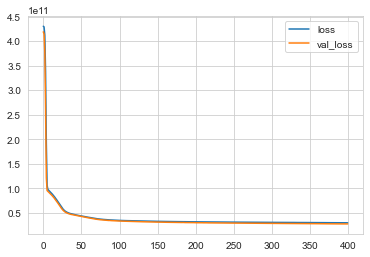

In [49]:
losses.plot()

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [51]:
predictions = model.predict(X_test)

In [53]:
mean_squared_error(y_test, predictions)

27226718212.970726

In [54]:
np.sqrt(mean_squared_error(y_test, predictions))

165005.20662382361

In [55]:
mean_absolute_error(y_test, predictions)

102466.2903742284

Around 102 thousand dollars off from the mean `price`

In [57]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [58]:
5.402966e+05

540296.6

In [59]:
102466.2903742284 / 540296.6

0.1896482235391235

Off about 18%, not too great and not too horrible either

In [60]:
explained_variance_score(y_test, predictions)

0.7949591489326139

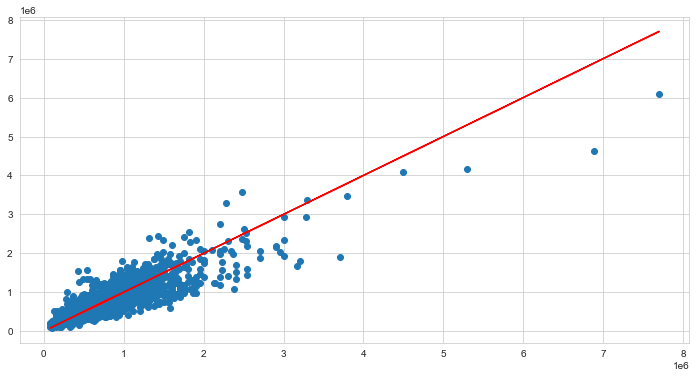

In [61]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

**Predict a brand new house**

In [69]:
single_house = df.drop('price', axis=1).iloc[0]
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [70]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [71]:
model.predict(single_house)

array([[287325.22]], dtype=float32)

In [72]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
